In [19]:
run "/Users/octavia/Dropbox/fire/fire_model/startup.py"

In [20]:
params = default_params()

update = {
          "alpha" : 0.05,
          "RI" : 20,
          "severity" : 0.70,
          "severity_type" : "random",
          "ignition_type" : "random",          
         }

params.update(update)
p = RCSR(update)
p.run()



AttributeError: 'RCSR' object has no attribute 'a'

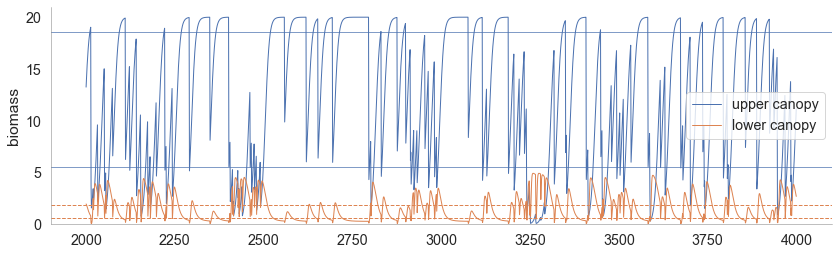

In [12]:
canopy_plot(p , nfire = 100)

In [5]:
# Simulation batch
sim_dir = os.path.join(project_dir, "model_output", "random_check")

file_dir = sim_dir + "/all_sims"
if os.path.isdir(file_dir)  == False:
    os.mkdir(file_dir)
    
sys.path.append(sim_dir)
if "params" in sys.modules:
    del sys.modules["params"]
from params import all_params


In [6]:
all_sims = read_all_sims(file_dir)

In [9]:
res = compute_all_errors(all_sims, sim_dir, recomp = True)

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
res = pd.read_pickle(sim_dir + "/analytic_errs.pkl")

In [ ]:
subset = res[(res.alpha==0.02)&(res.r_l == 1.5) & (res.beta == 0.2)]
x_var = "RI"
y_var = "severity"
subset = subset.sort_values(by = [x_var, y_var])
axes = plot_G_grid(subset, x_var, y_var)

RIs = np.unique(subset.RI)
p = RCSR(subset.iloc[0])
severities = p.max_severity(p.r_u*p.S**p.beta, RIs)
axes[0, 0].plot(RIs, severities, '--' )
axes[1, 0].plot(RIs, severities, '--' )


## Where are the errors biggest?

In [8]:

x = res["G_l_mean_e"]
cols = ["r_l", "alpha", "severity", "RI", "G_l_mean_a", "G_l_mean_c", "G_l_mean_e" ]
high_error_case = res[x == np.max(x)]
high_error_case[cols]



NameError: name 'res' is not defined

In [ ]:
p = all_sims.loc[high_error_case.index[0]][0]

In [ ]:
canopy_plot(p, 100)


In [ ]:
compute_errors_mean(p)[0]

### Diagnostic plots for high-error  cases

In [ ]:
check_convergence(p, to = 0, slice = 100)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14,4) )
axes[0].hist(p.record.time_past_fire, 20, normed=True);
y = np.arange(2, 100)
lambda_RI = 1/p.RI
axes[0].plot(y, lambda_RI*np.exp(-lambda_RI*y), label = "RI pdf")
axes[0].set_title("Histograph of RIs")
axes[0].set_xlabel("RI")

axes[1].hist(p.record.u_severity, 20, normed=True);
axes[1].set_title("Histograph of severities")
axes[1].set_xlabel("severity")